In [16]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

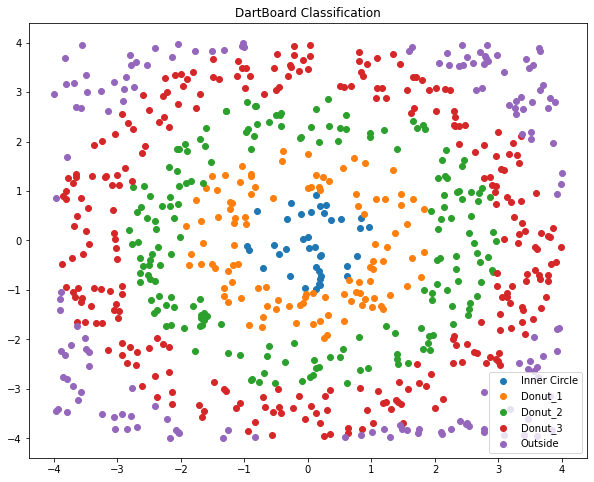

In [112]:
# Randomly generate (x,y) data points without a bounding box of (-4,4)
X = (torch.rand(size=(750,2))-0.5)*8

# Assign 5 labels based on radius (4 circles with radius 1,2,3,4 and outside of circle)
y = list()
radiuses = np.array([1,2,3,4,np.inf])
for point in X:

    # Calculate radius of this point
    radius = torch.sqrt((point[0]**2 + point[1]**2))

    # Begin a while loop, to figure out which label this gets
    idx = 0
    while radius > radiuses[idx]:
        idx += 1
    
    # Assign this label as the index (0 for innermost, 1 for next circle...5 outside circle)
    y.append(idx)

# Convert to torch.Tensor
y = torch.Tensor(y)

# Plot all the points with their labels
legend = ['Inner Circle','Donut_1','Donut_2','Donut_3','Outside']
plt.figure(figsize=(10,8))
for i in range(0,5):
    
    # Get all the points with this label
    bool_indices = y == i

    # Filter X with these indices and plot
    plt.scatter(X[:,0][bool_indices],X[:,1][bool_indices])

plt.title('DartBoard Classification')
plt.legend(legend)

In [113]:
# Split into train and test data
torch.manual_seed(21)
rand_indices = torch.randperm(X.shape[0])
X = X[rand_indices]
y = y[rand_indices]
train_len = int(X.shape[0]*2/3)
X_train = X[0:train_len]
y_train = y[0:train_len]
X_test = X[train_len:]
y_test = y[train_len:]

Build a simple Neural Network for classification

In [122]:
# Set the layer sizes
input_ = 2
h1 = 128
h2 = 64
h3 = 128
output_ = 5

# Build the model sequentially
model = torch.nn.Sequential(
    torch.nn.Linear(input_,h1),
    torch.nn.ReLU(),
    torch.nn.Linear(h1,h2),
    torch.nn.ReLU(),
    torch.nn.Linear(h2,h3),
    torch.nn.ReLU(),
    torch.nn.Linear(h3,output_),
    torch.nn.Softmax(dim=1)
)

# Create our loss function
loss_fn = torch.nn.CrossEntropyLoss()

# Set the optimizer up
optimizer = torch.optim.Adam(model.parameters(),lr=0.00065)

# Set how many epochs and the batchsize
epochs = 1024
batch_size = 50

In [123]:
# Now to run the neural network
for epoch in range(epochs):
    i = 0
    correct = 0
    while i*batch_size < X_train.shape[0]:

        # Grab the features and labels
        feat = X_train[i*batch_size:np.minimum((i+1)*batch_size,X_train.shape[0])]
        labels = y_train[i*batch_size:np.minimum((i+1)*batch_size,X_train.shape[0])].long()

        # Get predictions (argmax becuase of softmax)
        labels_predict = model(feat)

        # Get loss
        loss = loss_fn(labels_predict,labels)

        # Zero out the gradients
        model.zero_grad()

        # Back propogate
        loss.backward()

        # Update all weight parameters
        optimizer.step()

        # Update i
        i += 1

        with torch.no_grad():
            labels_predict = torch.argmax(labels_predict,axis=1)
            correct += torch.sum(labels.eq(labels_predict))

    # Print the loss and accuracy after every epoch
    print('Epoch:',epoch,'\tLoss:',loss.item(),'\tAccuracy:',float(correct)/X_train.shape[0]*100)

Epoch: 0 	Loss: 1.5746535062789917 	Accuracy: 28.799999999999997
Epoch: 1 	Loss: 1.5230052471160889 	Accuracy: 37.2
Epoch: 2 	Loss: 1.4914911985397339 	Accuracy: 37.2
Epoch: 3 	Loss: 1.4889578819274902 	Accuracy: 37.2
Epoch: 4 	Loss: 1.478977918624878 	Accuracy: 37.2
Epoch: 5 	Loss: 1.4706846475601196 	Accuracy: 37.2
Epoch: 6 	Loss: 1.4646183252334595 	Accuracy: 37.2
Epoch: 7 	Loss: 1.454430103302002 	Accuracy: 37.2
Epoch: 8 	Loss: 1.4418007135391235 	Accuracy: 40.0
Epoch: 9 	Loss: 1.4327510595321655 	Accuracy: 39.6
Epoch: 10 	Loss: 1.4236102104187012 	Accuracy: 40.2
Epoch: 11 	Loss: 1.4141595363616943 	Accuracy: 40.8
Epoch: 12 	Loss: 1.402174472808838 	Accuracy: 40.8
Epoch: 13 	Loss: 1.3864935636520386 	Accuracy: 41.199999999999996
Epoch: 14 	Loss: 1.3656991720199585 	Accuracy: 45.0
Epoch: 15 	Loss: 1.338326096534729 	Accuracy: 52.0
Epoch: 16 	Loss: 1.3055853843688965 	Accuracy: 62.0
Epoch: 17 	Loss: 1.271100401878357 	Accuracy: 68.2
Epoch: 18 	Loss: 1.2392445802688599 	Accuracy: 70.0

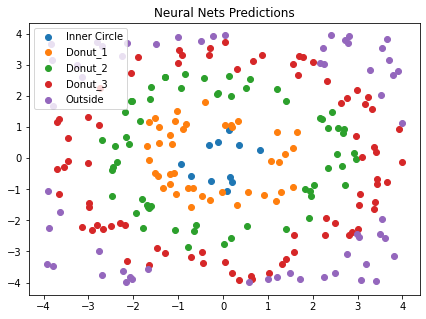

In [124]:
# Make prediction for for the model
y_test_predict = torch.argmax(model(X_test),axis=1)

# Iterate and plot, like last time
legend = ['Inner Circle','Donut_1','Donut_2','Donut_3','Outside']
plt.figure(figsize=(7,5))
for i in range(0,5):
    
    # Get all the points with this label
    bool_indices = y_test_predict == i

    # Filter X with these indices and plot
    plt.scatter(X_test[:,0][bool_indices],X_test[:,1][bool_indices])

plt.title('Neural Nets Predictions')
plt.legend(legend)

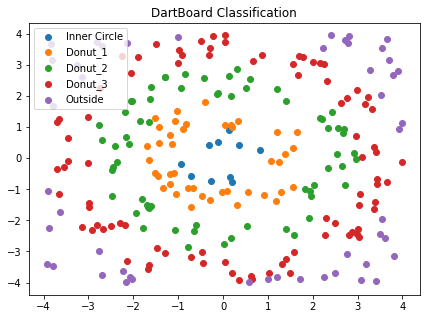

In [125]:
# The true test set
legend = ['Inner Circle','Donut_1','Donut_2','Donut_3','Outside']
plt.figure(figsize=(7,5))
for i in range(0,5):
    
    # Get all the points with this label
    bool_indices = y_test == i

    # Filter X with these indices and plot
    plt.scatter(X_test[:,0][bool_indices],X_test[:,1][bool_indices])

plt.title('DartBoard Classification')
plt.legend(legend)